In [ ]:
import spacy

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

In [ ]:
v.fit(["Deshani Shashikala went to the Rusl"])
v.vocabulary_

{'deshani': 0, 'shashikala': 2, 'went': 5, 'to': 4, 'the': 3, 'rusl': 1}

In [ ]:
v = CountVectorizer(ngram_range=(1,1))
v.fit(["Deshani Shashikala went to the Rusl"])
v.vocabulary_

{'deshani': 0, 'shashikala': 2, 'went': 5, 'to': 4, 'the': 3, 'rusl': 1}

In [ ]:
v = CountVectorizer(ngram_range=(1,3))
v.fit(["Deshani Shashikala went to the Rusl"])
v.vocabulary_

{'deshani': 0,
 'shashikala': 4,
 'went': 12,
 'to': 9,
 'the': 7,
 'rusl': 3,
 'deshani shashikala': 1,
 'shashikala went': 5,
 'went to': 13,
 'to the': 10,
 'the rusl': 8,
 'deshani shashikala went': 2,
 'shashikala went to': 6,
 'went to the': 14,
 'to the rusl': 11}

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

def preprocess(text):
  doc = nlp(text)
  preprocessed_tokens = []

  for token in doc:
    if not token.is_stop and not token.is_punct:
      preprocessed_tokens.append(token.lemma_)
    else:
      continue

  return " ".join(preprocessed_tokens)

preprocess('Hello Guys Lets have a fun today with my frind Sashikala and me')

'hello Guys Lets fun today frind Sashikala'

In [ ]:
sample_texts = ["Hello, lets see the my frind' image .. i seen them before the practicals",
                "I saw his photo before, on of my frind show me yesterday",
                "Should we go to the shopping mall"]

preprocessed_texts = [preprocess(text) for text in sample_texts]

for text in preprocessed_texts:
  print(text)

hello let frind image see practical
see photo frind yesterday
shopping mall


In [ ]:
v = CountVectorizer(ngram_range=(1,2))
v.fit(preprocessed_texts)
v.vocabulary_

{'hello': 3,
 'let': 7,
 'frind': 0,
 'image': 5,
 'see': 13,
 'practical': 12,
 'hello let': 4,
 'let frind': 8,
 'frind image': 1,
 'image see': 6,
 'see practical': 15,
 'photo': 10,
 'yesterday': 18,
 'see photo': 14,
 'photo frind': 11,
 'frind yesterday': 2,
 'shopping': 16,
 'mall': 9,
 'shopping mall': 17}

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dataset/bbc_text_cls new.csv')
df.head()

,text,labels,percentage
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,10%
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,10%
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,10%
3,High fuel prices hit BA's profits\n\nBritish A...,business,10%
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,10%


In [ ]:
print(df.shape)

(2225, 3)


In [ ]:
df.labels.value_counts()

,count
labels,
sport,511
business,510
politics,417
tech,401
entertainment,386


In [ ]:
mini_samples = 386

df_sport = df[df['labels'] =='sport'].sample(mini_samples, random_state=2025)
df_business = df[df['labels'] == 'business'].sample(mini_samples, random_state=2025)
df_politics = df[df['labels']== 'politics'].sample(mini_samples, random_state=2025)
df_tech = df[df['labels'] == 'tech'].sample(mini_samples, random_state=2025)
df_entertainment = df[df['labels']=='entertainment'].sample(mini_samples, random_state=2025)

balanced_df = pd.concat([df_sport, df_business, df_politics, df_tech, df_entertainment], axis=0)
balanced_df.tail()

,text,labels,percentage
833,Moreno debut makes Oscar mark\n\nCatalina Sand...,entertainment,10%
586,DVD review: Spider-Man 2\n\nIt's a universal r...,entertainment,10%
860,Women in film 'are earning less'\n\nWomen in t...,entertainment,10%
732,Singer Ferguson 'facing eviction'\n\nThree Deg...,entertainment,10%
572,Tautou film tops Cesar prize nods\n\nFrench fi...,entertainment,10%


In [ ]:
balanced_df['cat_num'] = balanced_df['labels'].map(
    {
        'sport':0,
        'business':1,
        'politics':2,
        'tech':3,
        'entertainment':4
    }
)

balanced_df.tail()

,text,labels,percentage,cat_num
833,Moreno debut makes Oscar mark\n\nCatalina Sand...,entertainment,10%,4
586,DVD review: Spider-Man 2\n\nIt's a universal r...,entertainment,10%,4
860,Women in film 'are earning less'\n\nWomen in t...,entertainment,10%,4
732,Singer Ferguson 'facing eviction'\n\nThree Deg...,entertainment,10%,4
572,Tautou film tops Cesar prize nods\n\nFrench fi...,entertainment,10%,4


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    balanced_df['text'],
    balanced_df['cat_num'],
    test_size=0.2,
    stratify=balanced_df['cat_num'],
    random_state=2025,
)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1544,)
(386,)
(1544,)
(386,)


In [ ]:
y_train.value_counts()

,count
cat_num,
0,309
3,309
1,309
4,309
2,308


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import classification_report

PreProcessorWraped = FunctionTransformer(preprocess)
cf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('model', MultinomialNB())
])

cf.fit(X_train, y_train)

y_predict = cf.predict(X_test)

print(classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        78
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00        77

    accuracy                           1.00       386
   macro avg       1.00      1.00      1.00       386
weighted avg       1.00      1.00      1.00       386



In [ ]:
balanced_df['preprocessed_text'] = balanced_df['text'].apply(preprocess)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    balanced_df['preprocessed_text'],
    balanced_df['cat_num'],
    test_size = 0.2,
    stratify = balanced_df['cat_num'],
    random_state = 2025,
)

In [ ]:
cf = Pipeline([
    ('conutervectorize', CountVectorizer(ngram_range=(1,2))),
    ('model', MultinomialNB())
])

cf.fit(X_train, y_train)

y_predict = cf.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        77
           1       0.99      0.99      0.99        77
           2       0.93      1.00      0.96        78
           3       0.94      1.00      0.97        77
           4       1.00      0.88      0.94        77

    accuracy                           0.97       386
   macro avg       0.97      0.97      0.97       386
weighted avg       0.97      0.97      0.97       386



In [ ]:
cf = Pipeline([
    ('conutervectorize', CountVectorizer(ngram_range=(1,1))),
    ('model', MultinomialNB())
])

cf.fit(X_train, y_train)

y_predict = cf.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        77
           1       0.99      0.99      0.99        77
           2       0.93      1.00      0.96        78
           3       0.94      1.00      0.97        77
           4       1.00      0.88      0.94        77

    accuracy                           0.97       386
   macro avg       0.97      0.97      0.97       386
weighted avg       0.97      0.97      0.97       386



In [ ]:
cf = Pipeline([
    ('conutervectorize', CountVectorizer(ngram_range=(1,3))),
    ('model', MultinomialNB())
])

cf.fit(X_train, y_train)

y_predict = cf.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        77
           1       0.99      0.96      0.97        77
           2       0.93      1.00      0.96        78
           3       0.92      1.00      0.96        77
           4       1.00      0.88      0.94        77

    accuracy                           0.96       386
   macro avg       0.97      0.96      0.96       386
weighted avg       0.97      0.96      0.96       386



In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)
cm

array([[75,  1,  1,  0,  0],
       [ 0, 74,  0,  3,  0],
       [ 0,  0, 78,  0,  0],
       [ 0,  0,  0, 77,  0],
       [ 0,  0,  5,  4, 68]])

Text(45.722222222222214, 0.5, 'Truth')

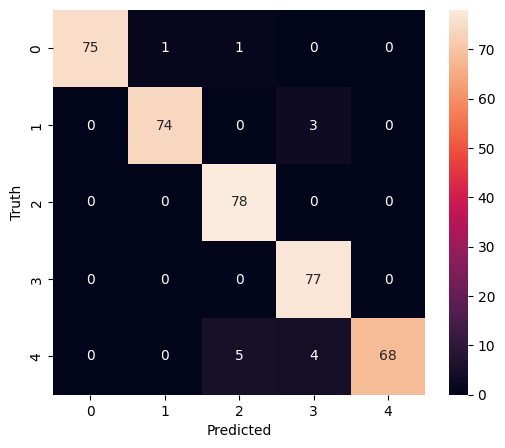

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn

plt.figure(figsize=(6,5))
sn.heatmap(cm, annot=True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')